# Doing the imports required for logistic regression and graphing

### Please do not mind the keyboard Interrupts if any. They were used to ensure that the cell was running.

In [1]:
import numpy as np
import scipy #only sparse matrices allowed
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#We need to increase the categorization accuracy.

In [3]:
df_train = pd.read_csv(r"./ift3395-6390-weatherevents/train.csv")

In [4]:
submit_df = pd.read_csv(r"./ift3395-6390-weatherevents/test.csv")

In [5]:
df_train.head()

,S.No,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,...,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,time,LABELS
0,0,-24.758801,242.1875,16.019615,-4.391696,4.777769,-6.388222,7.725320,0.010277,102326.2344,...,221.594223,261.823212,6.660000e-09,295.622253,293.301514,197.698624,12234.78809,64.372635,20030804,0
1,1,23.820078,277.8125,47.802036,8.623652,9.308566,4.596105,9.938286,0.018531,100803.1094,...,220.343719,269.106720,3.670000e-16,302.496826,302.654083,71.571518,12463.97266,66.834389,20071006,1
2,2,23.820078,276.8750,11.556691,-2.483993,-6.009627,-3.503036,-5.921963,0.007468,101885.3906,...,215.933487,259.610718,0.000000e+00,299.854919,293.339996,160.414246,12099.36133,64.209663,20020331,0
3,3,13.494133,253.1250,53.186630,0.150933,-1.319407,3.757741,-2.172120,0.018809,100824.6328,...,218.457672,267.374329,9.800000e-08,301.606934,299.973450,72.840614,12379.26855,66.243294,20000906,0
4,4,-24.524120,241.2500,23.353998,-7.467506,-5.113565,-9.545109,-4.691221,0.011672,102553.8984,...,214.316605,263.575409,6.410000e-09,295.819488,295.101257,218.449570,12261.22656,64.876427,20000906,0


Let's drop the S.No and separate the labels first of all

In [6]:
df_train2 = df_train.drop(columns=["S.No"])
submit_df = submit_df.drop(columns=["S.No"])
#just to make doubly or triply sure that we don't lose these.
labels = df_train2[["LABELS"]]

In [7]:
df_train2.head()

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,time,LABELS
0,-24.758801,242.1875,16.019615,-4.391696,4.777769,-6.388222,7.725320,0.010277,102326.2344,102326.2344,221.594223,261.823212,6.660000e-09,295.622253,293.301514,197.698624,12234.78809,64.372635,20030804,0
1,23.820078,277.8125,47.802036,8.623652,9.308566,4.596105,9.938286,0.018531,100803.1094,100803.1094,220.343719,269.106720,3.670000e-16,302.496826,302.654083,71.571518,12463.97266,66.834389,20071006,1
2,23.820078,276.8750,11.556691,-2.483993,-6.009627,-3.503036,-5.921963,0.007468,101885.3906,101885.3906,215.933487,259.610718,0.000000e+00,299.854919,293.339996,160.414246,12099.36133,64.209663,20020331,0
3,13.494133,253.1250,53.186630,0.150933,-1.319407,3.757741,-2.172120,0.018809,100824.6328,100824.6328,218.457672,267.374329,9.800000e-08,301.606934,299.973450,72.840614,12379.26855,66.243294,20000906,0
4,-24.524120,241.2500,23.353998,-7.467506,-5.113565,-9.545109,-4.691221,0.011672,102553.8984,102553.8984,214.316605,263.575409,6.410000e-09,295.819488,295.101257,218.449570,12261.22656,64.876427,20000906,0


What even is logistic regression?<br>
It's a linear classification algorithm, which uses a sigmoid activation function.<br>

## Let's do some EDA (exploratory data analysis): 

In [8]:
#https://camrongodbout.medium.com/how-to-approach-data-tabular-data-326c94f0f274
#https://www.kaggle.com/vbmokin/automatic-eda-with-pandas-profiling-2-9-09-2020

### Let's get to know our data better:

In [9]:
df_train2.columns

Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'time', 'LABELS'],
      dtype='object')

In [10]:
#these are the current number of features
len(df_train2.columns) - 1

19

In [11]:
df_train2.dtypes

lat       float64
lon       float64
TMQ       float64
U850      float64
V850      float64
UBOT      float64
VBOT      float64
QREFHT    float64
PS        float64
PSL       float64
T200      float64
T500      float64
PRECT     float64
TS        float64
TREFHT    float64
Z1000     float64
Z200      float64
ZBOT      float64
time        int64
LABELS      int64
dtype: object

In [12]:
df_train2.dtypes.value_counts()

float64    18
int64       2
dtype: int64

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47760 entries, 0 to 47759
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S.No    47760 non-null  int64  
 1   lat     47760 non-null  float64
 2   lon     47760 non-null  float64
 3   TMQ     47760 non-null  float64
 4   U850    47760 non-null  float64
 5   V850    47760 non-null  float64
 6   UBOT    47760 non-null  float64
 7   VBOT    47760 non-null  float64
 8   QREFHT  47760 non-null  float64
 9   PS      47760 non-null  float64
 10  PSL     47760 non-null  float64
 11  T200    47760 non-null  float64
 12  T500    47760 non-null  float64
 13  PRECT   47760 non-null  float64
 14  TS      47760 non-null  float64
 15  TREFHT  47760 non-null  float64
 16  Z1000   47760 non-null  float64
 17  Z200    47760 non-null  float64
 18  ZBOT    47760 non-null  float64
 19  time    47760 non-null  int64  
 20  LABELS  47760 non-null  int64  
dtypes: float64(18), int64(3)
memory usa

In [14]:
#Hmmm, interesting, it seems like our data does not have any nulls.
df_train2.describe()

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,time,LABELS
count,47760.000000,47760.000000,47760.000000,47760.000000,47760.000000,47760.000000,47760.000000,47760.000000,47760.000000,47760.000000,47760.000000,47760.000000,4.776000e+04,47760.000000,47760.000000,47760.000000,47760.000000,47760.000000,4.776000e+04,47760.000000
mean,-2.933507,269.270833,34.835679,-0.620293,0.010405,-2.152124,-0.759455,0.014378,101554.051530,101556.341640,216.894460,264.375806,4.629730e-08,298.309467,296.892718,135.522882,12291.617727,65.378137,2.002393e+07,0.386265
std,22.906755,41.046591,12.869552,6.847307,4.332385,6.043284,4.761139,0.003969,545.863555,544.855281,2.307294,3.507889,2.385750e-07,3.794155,4.021797,42.518096,130.926922,1.041089,3.658871e+04,0.762511
min,-31.095176,229.062500,6.960679,-58.805229,-26.216906,-58.260475,-20.760452,0.004364,96611.601560,96611.601560,208.824249,249.146011,-4.400000e-23,289.330750,285.426666,63.335205,11718.249020,62.433594,1.996061e+07,0.000000
25%,-24.582790,241.875000,24.033083,-5.507042,-2.307535,-6.589128,-3.800056,0.011245,101152.117200,101157.632800,215.504303,262.910065,1.610000e-14,295.860687,294.221153,101.836487,12229.982420,64.657728,2.000091e+07,0.000000
50%,-3.872229,253.125000,34.896574,-1.671802,0.157172,-2.687853,-0.774992,0.014566,101527.957050,101531.250000,217.162437,265.245117,5.280000e-09,298.685181,297.301331,133.772980,12321.946290,65.472763,2.001121e+07,0.000000
75%,21.766623,277.187500,44.727101,3.621788,2.341779,1.720815,2.072186,0.017987,101887.476600,101888.933600,218.430748,266.877350,3.120000e-08,301.760101,300.474060,162.683060,12391.460940,66.327797,2.004082e+07,0.000000
max,24.054759,354.375000,80.641357,32.277344,58.060246,30.215387,31.106283,0.022366,103996.953100,103996.953100,229.172897,273.580810,1.440000e-05,303.869812,304.364197,328.123688,12511.033200,67.131653,2.010103e+07,2.000000


In [15]:
#I guess we can't really do exploratory plots, if we don't have matplotlib / seaborn / plotly
#Or so you would think, we still have pandas
#I guess I would like to know whether our classes are imbalanced
labels.value_counts()

LABELS
0         37535
2          8223
1          2002
dtype: int64

# Outlier removal:

In [16]:
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
#IQR
df_train2 = df_train2.drop(columns=["LABELS"])
Q1 = df_train2.quantile(0.25)
Q3 = df_train2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

lat       4.634941e+01
lon       3.531250e+01
TMQ       2.069402e+01
U850      9.128829e+00
V850      4.649315e+00
UBOT      8.309943e+00
VBOT      5.872241e+00
QREFHT    6.741192e-03
PS        7.353594e+02
PSL       7.313008e+02
T200      2.926445e+00
T500      3.967285e+00
PRECT     3.119998e-08
TS        5.899414e+00
TREFHT    6.252907e+00
Z1000     6.084657e+01
Z200      1.614785e+02
ZBOT      1.670069e+00
time      3.991300e+04
dtype: float64


In [17]:
df_train2_IQR = df_train2[~((df_train2 < (Q1 - 1.5 * IQR)) |(df_train2 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_train2_IQR.shape

(29888, 19)

Relevant Dataset = $[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]$ (Dataset without outliers)<br>
where $Q1$ = first quartile,$Q3$ = third quartile, $IQR = [Q1, Q3]$ is the interquartile range.

In [18]:
#It looks like we lose approximately 17kish values in our dataset if we do this.
#Let's just do some preprocessing and some feature engineering and continue with our problem.

# Pre-processing / Feature Engineering:

In [19]:
#Let's just look at the data and try to do some feature extraction / processing
df_train2.head()
#I really hate this time column. Just look at it! It's an int and it will probably cause our model to blow up.
#Let's at least split it into year, month and date.

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,time
0,-24.758801,242.1875,16.019615,-4.391696,4.777769,-6.388222,7.725320,0.010277,102326.2344,102326.2344,221.594223,261.823212,6.660000e-09,295.622253,293.301514,197.698624,12234.78809,64.372635,20030804
1,23.820078,277.8125,47.802036,8.623652,9.308566,4.596105,9.938286,0.018531,100803.1094,100803.1094,220.343719,269.106720,3.670000e-16,302.496826,302.654083,71.571518,12463.97266,66.834389,20071006
2,23.820078,276.8750,11.556691,-2.483993,-6.009627,-3.503036,-5.921963,0.007468,101885.3906,101885.3906,215.933487,259.610718,0.000000e+00,299.854919,293.339996,160.414246,12099.36133,64.209663,20020331
3,13.494133,253.1250,53.186630,0.150933,-1.319407,3.757741,-2.172120,0.018809,100824.6328,100824.6328,218.457672,267.374329,9.800000e-08,301.606934,299.973450,72.840614,12379.26855,66.243294,20000906
4,-24.524120,241.2500,23.353998,-7.467506,-5.113565,-9.545109,-4.691221,0.011672,102553.8984,102553.8984,214.316605,263.575409,6.410000e-09,295.819488,295.101257,218.449570,12261.22656,64.876427,20000906


In [20]:
#https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas
#converting to string for the split
df_train2["time"] = df_train2["time"].astype(str)
#expand will return multiple columns with the split strings
split_columns = df_train2["time"].str.split("",expand=True)
year = split_columns[1] + split_columns[2] + split_columns[3] +split_columns[4]
month = split_columns[5] + split_columns[6]
date = split_columns[7] + split_columns[8]

In [21]:
#https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas
#converting to string for the split
submit_df["time"] = submit_df["time"].astype(str)
#expand will return multiple columns with the split strings
split_columns_submit_df = submit_df["time"].str.split("",expand=True)
year_submit_df = split_columns_submit_df[1] + split_columns_submit_df[2] + split_columns_submit_df[3] +split_columns_submit_df[4]
month_submit_df = split_columns_submit_df[5] + split_columns_submit_df[6]
date_submit_df = split_columns_submit_df[7] + split_columns_submit_df[8]

In [22]:
#converting series to df and renaming the column so we dont end up with a bunch of columns named 0
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
year = pd.DataFrame(year)
month = pd.DataFrame(month)
date = pd.DataFrame(date)

year = year.rename(columns={0: "year"})
month = month.rename(columns={0: "month"})
date = date.rename(columns={0: "date"})

#we need to convert the strings back to integers
#https://datatofish.com/string-to-integer-dataframe/
year['year'] = year['year'].astype(int)
month['month'] = month['month'].astype(int)
date['date'] = date['date'].astype(int)

In [23]:
#converting series to df and renaming the column so we dont end up with a bunch of columns named 0
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
year_submit_df = pd.DataFrame(year_submit_df)
month_submit_df = pd.DataFrame(month_submit_df)
date_submit_df = pd.DataFrame(date_submit_df)

year_submit_df = year_submit_df.rename(columns={0: "year"})
month_submit_df = month_submit_df.rename(columns={0: "month"})
date_submit_df = date_submit_df.rename(columns={0: "date"})

#we need to convert the strings back to integers
#https://datatofish.com/string-to-integer-dataframe/
year_submit_df['year'] = year_submit_df['year'].astype(int)
month_submit_df['month'] = month_submit_df['month'].astype(int)
date_submit_df['date'] = date_submit_df['date'].astype(int)

In [24]:
#adding these back to the original df
df = pd.concat([df_train2, year, month, date], axis = 1)
df = df.drop(columns=["time"])
df.head()

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,...,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,year,month,date
0,-24.758801,242.1875,16.019615,-4.391696,4.777769,-6.388222,7.725320,0.010277,102326.2344,102326.2344,...,261.823212,6.660000e-09,295.622253,293.301514,197.698624,12234.78809,64.372635,2003,8,4
1,23.820078,277.8125,47.802036,8.623652,9.308566,4.596105,9.938286,0.018531,100803.1094,100803.1094,...,269.106720,3.670000e-16,302.496826,302.654083,71.571518,12463.97266,66.834389,2007,10,6
2,23.820078,276.8750,11.556691,-2.483993,-6.009627,-3.503036,-5.921963,0.007468,101885.3906,101885.3906,...,259.610718,0.000000e+00,299.854919,293.339996,160.414246,12099.36133,64.209663,2002,3,31
3,13.494133,253.1250,53.186630,0.150933,-1.319407,3.757741,-2.172120,0.018809,100824.6328,100824.6328,...,267.374329,9.800000e-08,301.606934,299.973450,72.840614,12379.26855,66.243294,2000,9,6
4,-24.524120,241.2500,23.353998,-7.467506,-5.113565,-9.545109,-4.691221,0.011672,102553.8984,102553.8984,...,263.575409,6.410000e-09,295.819488,295.101257,218.449570,12261.22656,64.876427,2000,9,6


In [25]:
#adding these back to the original df
submit_df = pd.concat([submit_df, year_submit_df, month_submit_df, date_submit_df], axis = 1)
submit_df = submit_df.drop(columns=["time"])
submit_df.head()

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,...,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,year,month,date
0,-31.095176,353.1250,22.372244,-1.994936,-0.002513,-7.732825,-1.864900,0.008203,102809.6719,102809.6719,...,258.135406,4.060000e-08,290.377930,289.014862,234.634003,12023.84082,63.400764,2013,9,27
1,-31.095176,353.4375,21.536032,-2.058918,0.397359,-8.436489,-0.940275,0.007887,102816.6016,102816.6016,...,258.205994,1.670000e-08,290.377228,288.873138,234.982056,12023.83301,63.348942,2013,9,27
2,-31.095176,353.7500,20.465317,-2.128485,0.717785,-8.842417,0.152449,0.007695,102827.8594,102827.8594,...,258.242279,1.220000e-08,290.377228,288.641480,235.631378,12025.41113,63.281322,2013,9,27
3,-31.095176,354.0625,19.967148,-2.126235,1.123356,-8.773702,1.251795,0.007519,102830.5391,102830.5391,...,258.335113,3.460000e-10,290.441406,288.420074,235.608460,12026.61426,63.216827,2013,9,27
4,-31.095176,354.3750,19.598663,-2.053118,1.823581,-8.472447,2.225254,0.007293,102823.8516,102823.8516,...,258.513702,5.920000e-10,290.468903,288.392975,235.004334,12027.29004,63.200485,2013,9,27


In [26]:
#Let's check if we have any entries in the year column less than 2000, oh nvm, we will the data is from 1996 to 2010 according to our guide document
#I guess we have no option but to normalize them even though it seems kind of icky.
#https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0
#It seems like standardizing/normalizing can make our regression models more numerically stable and reduce training times

In [27]:
#https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
#According to this, it seems like it is better to Normalize rather than Standardize when our data doesn't follow a normal distribution / we don't know. Counter-intuitive per the naming, I know.
#Based on the pandas plots above, it seems like some features do exhibit normal distribution:
# Normally dsitributed features: TMQ, U850, V850, UBOT, VBOT, PS, PSL, T200, but there is certainly some doubt as to whether they are truly normal, perhaps a better plot might help
#Even after trying with 15 bins, instead of 10 we can't really say.

# TO DO: 
- [DONE] Selectively normalize features + standardize other features + train + test.
- [DONE] Try a model with all standardized features.

In [28]:
df.columns

Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'year', 'month', 'date'],
      dtype='object')

In [29]:
#mixing standardization and normalization
df_to_standardize = df[["TMQ", "U850", "V850", "UBOT", "VBOT", "PS", "PSL", "T200"]]
df_to_normalize = df[["lat", "lon", "QREFHT", 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT', 'year', 'month', 'date']]

standardized_part = (df_to_standardize-df_to_standardize.mean())/df_to_standardize.std()
normalized_part = (df_to_normalize-df_to_normalize.min())/(df_to_normalize.max()-df_to_normalize.min())

combined_std_normal_parts = pd.concat([standardized_part, normalized_part], axis = 1)
combined_std_normal_parts.head()

,TMQ,U850,V850,UBOT,VBOT,PS,PSL,T200,lat,lon,...,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,year,month,date
0,-1.462061,-0.550786,1.100402,-0.700960,1.782089,1.414608,1.413022,2.036916,0.114894,0.104738,...,0.518817,4.625000e-04,0.432731,0.415833,0.507437,0.651551,0.412732,0.500000,0.636364,0.100000
1,1.007522,1.350012,2.146199,1.116649,2.246887,-1.375696,-1.382445,1.494937,0.995745,0.389027,...,0.816897,2.548611e-11,0.905566,0.909697,0.031105,0.940639,0.936726,0.785714,0.818182,0.166667
2,-1.808842,-0.272180,-1.389542,-0.223539,-1.084301,0.607000,0.603920,-0.416494,0.995745,0.381546,...,0.428271,3.055556e-18,0.723855,0.417865,0.366629,0.480726,0.378043,0.428571,0.181818,1.000000
3,1.425920,0.112632,-0.306947,0.977923,-0.296707,-1.336266,-1.342942,0.677509,0.808511,0.192020,...,0.745998,6.805556e-03,0.844359,0.768146,0.035898,0.833795,0.810909,0.285714,0.727273,0.166667
4,-0.892159,-0.999986,-1.182713,-1.223339,-0.825803,1.831679,1.830866,-1.117264,0.119149,0.097257,...,0.590527,4.451389e-04,0.446297,0.510869,0.585805,0.684900,0.519966,0.285714,0.727273,0.166667


In [30]:
#https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
#fully standardized
standardized_df = (df-df.mean())/df.std()
standardized_df.head()

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,...,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,year,month,date
0,-0.952789,-0.659819,-1.462061,-0.550786,1.100402,-0.700960,1.782089,-1.033118,1.414608,1.413022,...,-0.727672,-0.166142,-0.708251,-0.892935,1.462336,-0.434056,-0.965818,0.187581,0.089468,-1.292546
1,1.167934,0.208097,1.007522,1.350012,2.146199,1.116649,2.246887,1.046341,-1.375696,-1.382445,...,1.348650,-0.194058,1.103634,1.432535,-1.504098,1.316421,1.398778,1.281462,0.863561,-1.071569
2,1.167934,0.185257,-1.808842,-0.272180,-1.389542,-0.223539,-1.084301,-1.740834,0.607000,0.603920,...,-1.358392,-0.194058,0.407325,-0.883367,0.585430,-1.468425,-1.122358,-0.085889,-1.845764,1.690637
3,0.717153,-0.393354,1.425920,0.112632,-0.306947,0.977923,-0.296707,1.116509,-1.336266,-1.342942,...,0.854794,0.216715,0.869091,0.766009,-1.474249,0.669464,0.831012,-0.632829,0.476514,-1.071569
4,-0.942543,-0.682659,-0.892159,-0.999986,-1.182713,-1.223339,-0.825803,-0.681732,1.831679,1.830866,...,-0.228171,-0.167190,-0.656267,-0.445438,1.950386,-0.232123,-0.481909,-0.632829,0.476514,-1.071569


In [31]:
#https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
#fully standardized
standardized_df_submit = (submit_df-submit_df.mean())/submit_df.std()
standardized_df_submit.head()

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,...,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,year,month,date
0,-1.229333,2.042784,-0.983297,-0.193739,-0.123017,-0.825821,-0.358298,-1.410598,2.021822,2.022854,...,-1.498500,-0.106353,-1.929845,-1.795646,2.010704,-1.765335,-1.731259,1.326291,0.848069,1.30439
1,-1.229333,2.050397,-1.042802,-0.202247,-0.031383,-0.928823,-0.172188,-1.482267,2.033150,2.034209,...,-1.481222,-0.204784,-1.930019,-1.828771,2.017855,-1.765385,-1.777682,1.326291,0.848069,1.30439
2,-1.229333,2.058010,-1.118994,-0.211497,0.042045,-0.988242,0.047758,-1.525559,2.051553,2.052655,...,-1.472340,-0.223318,-1.930019,-1.882917,2.031197,-1.755198,-1.838255,1.326291,0.848069,1.30439
3,-1.229333,2.065623,-1.154444,-0.211198,0.134985,-0.978184,0.269036,-1.565374,2.055933,2.057046,...,-1.449615,-0.272138,-1.914115,-1.934666,2.030726,-1.747432,-1.896030,1.326291,0.848069,1.30439
4,-1.229333,2.073235,-1.180665,-0.201475,0.295448,-0.934087,0.464976,-1.616486,2.045002,2.046088,...,-1.405900,-0.271125,-1.907302,-1.941000,2.018313,-1.743070,-1.910669,1.326291,0.848069,1.30439


# Normalized and Standardized datasets:

In [32]:
normalized_df = (df-df.min())/(df.max()-df.min())
normalized_df.head()

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,...,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,year,month,date
0,0.114894,0.104738,0.122949,0.597409,0.367771,0.586287,0.549211,0.328485,0.773779,0.773779,...,0.518817,4.625000e-04,0.432731,0.415833,0.507437,0.651551,0.412732,0.500000,0.636364,0.100000
1,0.995745,0.389027,0.554302,0.740305,0.421531,0.710438,0.591877,0.786963,0.567543,0.567543,...,0.816897,2.548611e-11,0.905566,0.909697,0.031105,0.940639,0.936726,0.785714,0.818182,0.166667
2,0.995745,0.381546,0.062377,0.618354,0.239772,0.618897,0.286089,0.172448,0.714088,0.714088,...,0.428271,3.055556e-18,0.723855,0.417865,0.366629,0.480726,0.378043,0.428571,0.181818,1.000000
3,0.808511,0.192020,0.627382,0.647283,0.295424,0.700962,0.358386,0.802434,0.570458,0.570458,...,0.745998,6.805556e-03,0.844359,0.768146,0.035898,0.833795,0.810909,0.285714,0.727273,0.166667
4,0.119149,0.097257,0.222491,0.563639,0.250404,0.550606,0.309818,0.405958,0.804606,0.804606,...,0.590527,4.451389e-04,0.446297,0.510869,0.585805,0.684900,0.519966,0.285714,0.727273,0.166667


In [33]:
#Alright, I think we should read the paper and try to glean some insight, vis-a-vis features / normalize vs standardize / models / etc.

In [34]:
#let's add the target back to find the correlations
#https://www.youtube.com/watch?v=I7ep8a2Z1jQ&t=420s
temp = pd.concat([normalized_df, labels], axis = 1)
temp = temp.corr()
temp.loc[:,["LABELS"]].sort_values('LABELS').tail(10)
#now we have an idea which features are important

,LABELS
PRECT,0.032483
VBOT,0.036586
PSL,0.047543
PS,0.048827
month,0.053432
Z1000,0.058581
lon,0.094755
UBOT,0.212315
U850,0.300709
LABELS,1.000000


# Implementing Logistic Regression:

In [35]:
class logreg_classifier():  
    #https://github.com/rahulrrai/multinomial-logistic-regression/blob/master/multinomial-logistic-regression.ipynb
    #https://towardsdatascience.com/logistic-regression-from-scratch-with-numpy-da4cc3121ece
    #Let's begin by defining the logit function for our logisitic regression:    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    #Ok now, we have the activation function to predict our outputs
    #Let's try to define what actually goes into the activation function

    #We need to split our data into training and testing sets
    #We have 47760 samples to train and test
    #0.85 = train, 0.15 = test, approx.
    #41000 train, 6760 test
    
    def df_to_train_test_split(self,df,labels):
        #df is the normalized or standardized df
        #labels are just the labels.
#         So we need 6760 test exmaples, in 18:4:1 ratio roughly to match the train test.<br>
#         So we need:<br>
#         1s - 294<br>
#         2s - 1176<br>
#         0s - 5290<br>
        data_with_labels = pd.concat([df, labels],axis = 1)
        data_with_labels_0s = data_with_labels[data_with_labels["LABELS"] == 0]
        data_with_labels_1s = data_with_labels[data_with_labels["LABELS"] == 1]
        data_with_labels_2s = data_with_labels[data_with_labels["LABELS"] == 2]
        
        data_1_test = data_with_labels_1s.iloc[0:294]
        data_2_test = data_with_labels_2s.iloc[0:1176]
        data_0_test = data_with_labels_0s.iloc[0:5290]

        data_1_train = data_with_labels_1s.iloc[294:]
        data_2_train = data_with_labels_2s.iloc[1176:]
        data_0_train = data_with_labels_0s.iloc[5290:]
        
        test = pd.concat([data_1_test, data_2_test, data_0_test])
        #Houston, we have a problem, we need to shuffle the indices, but pandas has us covered
        #https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
        train = pd.concat([data_1_train, data_2_train, data_0_train])
        
        #Shuffling:
        #df = df.sample(frac=1).reset_index(drop=True)
        test = test.sample(frac=1).reset_index(drop=True)
        train = train.sample(frac=1).reset_index(drop=True)
        
        #Finally, we have our train and test sets.
        #Let's try to follow this post: https://github.com/rahulrrai/multinomial-logistic-regression/blob/master/multinomial-logistic-regression.ipynb
        train_np = train.to_numpy()
        test_np = test.to_numpy()

        #number of training examples
        #this is 41000 in our case
        num_of_train = train_np.shape[0]
        num_of_test = test_np.shape[0]
        #retaining just the features
        X = train_np[:,:-1]
        test_X = test_np[:,:-1]
        ##As we are using vector implementation adding a column in X with all the value 1
        # I'm guessing this is the bias term added to our train matrix itself
        X = np.hstack((np.ones((num_of_train,1)),X))
        test_X = np.hstack((np.ones((num_of_test,1)), test_X))
        #output 
        y = train_np[:,-1:]
        test_y = test_np[:,-1:]
        #each individual entry in y is a numpy array, let's see if this works out.
        
        #We're doing one vs all classification
        #We're going to one hot encode the outputs here
        #We have 3 classes and num_of_train data points, so y has the shape num_of_train,3
        Y = np.zeros((num_of_train, 3))

        #no. of classes
        k = np.unique(y)
        k.sort()

        #one hot encoding:
        #We are populating Y based on y, Y is a one hot encoded version of the 0/1/2 based y
        #So we iterate through all possible values of our output, casting it to int.
        for cls in k.astype(int):
            Y[np.where(y[:,-1] == cls),cls] = 1
            
#         y[:,-1] => this helps get rid of the array within the array, and just returns an array with the labels<br>
#         y[:,-1] = cls => this is pretty straightforward, we compare the the value of the label array with each possible class<br>
#         np.where(y[:,-1] == cls) => this returns the indices where the target is some specific class value<br>
#         Y[np.where(y[:,-1] == cls),cls] = 1 => since Y was already a zero matrix, we columnwise overwrite 1s, getting the one-hot encoding for each class<br>
        return X, Y, test_X, test_y

#         We have 3 models. One for each class.<br>
#         Our weight matrix W has the shape, 3,number of features<br>
#         Our cost array has the shape number_of_iterations,3<br>
    def train_logreg(self, X, Y, lr = 0.001, num_of_iterations = 50000):
        W = np.zeros((3,22))

        #learning rate - hyperparameter
        #lr
        num_of_train = X.shape[0]
        #no. of iterations to train
        #num_of_iterations = 20000
        #we can increase this later

        cost_arr = np.empty((0,3))

        for i in range(num_of_iterations):
            if i % 4000 == 0:
                print("Completed",i,"iterations.")
            #dot product is commutative.
            f_x = np.dot(X, W.T)
            g_x = self.sigmoid(f_x)

            #cost function -1/(num_of_train) * cross entropy for each class
            #cross entropy is sum (y log h + (1-y)log(1-h))
            cost = (-1/(num_of_train)) * ((Y * np.log(g_x)) + ((1-Y) * np.log(1-g_x)))
            cost = cost.sum(axis=0)
            cost_arr = np.vstack((cost_arr,cost))

            #apply gradient descent to calculate new weights
            #new weights = old weights - (learning_rate/m * summation[(g_x-y)*x])
            #apparently the summation can be replaced by matrix multiplication
            change = (lr/num_of_train) * np.dot((g_x-Y).T, X)
            W = W - change

        return cost_arr, W
        
    def predict_logreg(self, test_X, W, threshold):
        num_of_test = test_X.shape[0]

        #predict
        pred = np.zeros((num_of_test, 3))
        model_predict = self.sigmoid(np.dot(test_X, W.T))
        pred[model_predict > threshold] = 1

        #converting the prediction matrix into vectors
        predict = np.zeros((num_of_test,1))
        predict[pred[:,1] == 1] = 1
        predict[pred[:,2] == 1] = 2

        return predict

    def compute_accuracy(self, predictions, test_y):
        x = predictions == test_y
        #x.shape[0]
        x = x.reshape((x.shape[0]))
        count = 0
        for i in x:
            if i == True:
                count+=1
        return count / x.shape[0]

In [36]:
classifier = logreg_classifier()

In [37]:
X, Y, test_X, test_y = classifier.df_to_train_test_split(standardized_df,labels)

In [38]:
cost_arr, W = classifier.train_logreg(X, Y, lr = 0.001, num_of_iterations = 40000)

Completed 0 iterations.
Completed 4000 iterations.
Completed 8000 iterations.


KeyboardInterrupt: 

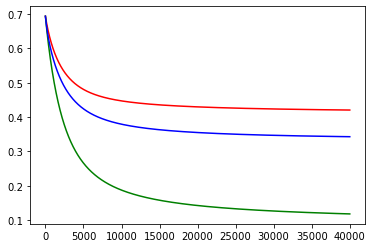

In [323]:
plt.plot(cost_arr[:,0], label='class 0', c='r')
plt.plot(cost_arr[:,1], label='class 1', c='g')
plt.plot(cost_arr[:,2], label='class 2', c='b')
plt.show()

In [324]:
predictions = classifier.predict_logreg(test_X, W, 0.5)
accuracy = classifier.compute_accuracy(predictions, test_y)
print(accuracy)

0.8109467455621302


Completed 0 iterations.
Completed 4000 iterations.
Completed 8000 iterations.
Completed 12000 iterations.
Completed 16000 iterations.
Completed 20000 iterations.
Completed 24000 iterations.
Completed 28000 iterations.
Completed 32000 iterations.
Completed 36000 iterations.


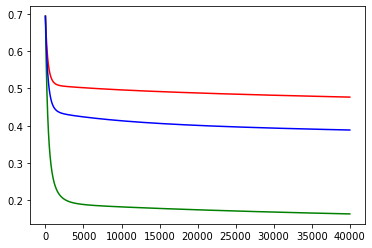

0.7825443786982249


In [325]:
classifier_norm = logreg_classifier()
X, Y, test_X, test_y = classifier_norm.df_to_train_test_split(normalized_df,labels)
cost_arr, W = classifier_norm.train_logreg(X, Y, lr = 0.001, num_of_iterations = 40000)

plt.plot(cost_arr[:,0], label='class 0', c='r')
plt.plot(cost_arr[:,1], label='class 1', c='g')
plt.plot(cost_arr[:,2], label='class 2', c='b')
plt.show()

predictions = classifier_norm.predict_logreg(test_X, W, 0.5)
accuracy = classifier_norm.compute_accuracy(predictions, test_y)
print(accuracy)

Completed 0 iterations.
Completed 4000 iterations.
Completed 8000 iterations.
Completed 12000 iterations.
Completed 16000 iterations.
Completed 20000 iterations.
Completed 24000 iterations.
Completed 28000 iterations.
Completed 32000 iterations.
Completed 36000 iterations.


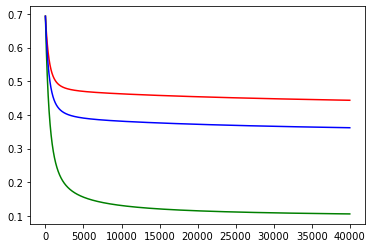

0.7977810650887573


In [326]:
classifier_combined = logreg_classifier()
X, Y, test_X, test_y = classifier_combined.df_to_train_test_split(combined_std_normal_parts,labels)
cost_arr, W = classifier_combined.train_logreg(X, Y, lr = 0.001, num_of_iterations = 40000)

plt.plot(cost_arr[:,0], label='class 0', c='r')
plt.plot(cost_arr[:,1], label='class 1', c='g')
plt.plot(cost_arr[:,2], label='class 2', c='b')
plt.show()

predictions = classifier_combined.predict_logreg(test_X, W, 0.5)
accuracy = classifier_combined.compute_accuracy(predictions, test_y)
print(accuracy)

Completed 0 iterations.
Completed 4000 iterations.
Completed 8000 iterations.
Completed 12000 iterations.
Completed 16000 iterations.
Completed 20000 iterations.
Completed 24000 iterations.
Completed 28000 iterations.
Completed 32000 iterations.
Completed 36000 iterations.


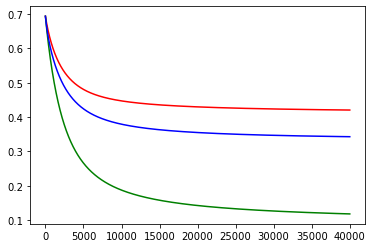

0.8109467455621302


In [349]:
classifier_stnd = logreg_classifier()
X_stnd, Y_stnd, test_X_stnd, test_y_stnd = classifier_stnd.df_to_train_test_split(standardized_df,labels)
cost_arr_stnd, W_stnd = classifier_stnd.train_logreg(X_stnd, Y_stnd, lr = 0.001, num_of_iterations = 40000)

plt.plot(cost_arr_stnd[:,0], label='class 0', c='r')
plt.plot(cost_arr_stnd[:,1], label='class 1', c='g')
plt.plot(cost_arr_stnd[:,2], label='class 2', c='b')
plt.show()

predictions_stnd = classifier_stnd.predict_logreg(test_X_stnd, W_stnd, 0.5)
accuracy_stnd = classifier_stnd.compute_accuracy(predictions_stnd, test_y_stnd)
print(accuracy_stnd)

# Creating a csv for submission:

In [353]:
test_X.shape

(6760, 22)

In [350]:
df_submit_np = standardized_df_submit.to_numpy()
num_submit = df_submit_np.shape[0]
X_submit = np.hstack((np.ones((num_submit,1)),df_submit_np))      

In [354]:
X_submit.shape

(7320, 22)

In [355]:
predictions_submit = classifier_stnd.predict_logreg(X_submit, W_stnd, 0.5)

In [363]:
#https://www.kite.com/python/answers/how-to-create-pandas-dataframe-from-a-numpy-array-in-python
predictions_df = pd.DataFrame(data=predictions_submit,columns=["LABELS"]).astype(int)
#https://stackoverflow.com/questions/18022845/pandas-index-column-title-or-name
predictions_df.index.name = "S.No"
predictions_df.to_csv(r"./ift3395-6390-weatherevents/submission.csv")

In [ ]:
def create_submission_file():
    

# Comparing different scaling methods:

In [327]:
# Let's say we set:
# lr = 0.001
# num_of_iterations = 40000
# Standardized df accuracy: 81.09%
# Normalized df accuracy: 78.25%
# Combined accuracy: 79.77%

# Try training the above model for 100k, 150k and 200k iterations.

### We stopped the following run after the 100k and 150k iterations for the first 2 models and decided to find other ways to improve performance.

In [ ]:
#We'll use the data normalization / standardization which gives us the best performance from the last attempt = standardizing
# Let's say we set:
# lr = 0.001
# iterations = 100k, 150k, 200k
# accuracy = 

In [ ]:
accuracy_list = []
iterations = [100000, 150000, 200000, 250000]
for i in iterations:
    classifier_iter = logreg_classifier()
    X_iter, Y_iter, test_X_iter, test_y_iter = classifier_iter.df_to_train_test_split(standardized_df,labels)
    cost_arr_iter, W_iter = classifier_iter.train_logreg(X_iter, Y_iter, lr = 0.001, num_of_iterations = i)

    plt.plot(cost_arr_iter[:,0], label='class 0', c='r')
    plt.plot(cost_arr_iter[:,1], label='class 1', c='g')
    plt.plot(cost_arr_iter[:,2], label='class 2', c='b')
    plt.show()

    predictions_iter = classifier_iter.predict_logreg(test_X_iter, W_iter, 0.5)
    accuracy_iter = classifier_iter.compute_accuracy(predictions_iter, test_y_iter)
    accuracy_list.append(accuracy_iter)
print(accuracy_list)

In [374]:
accuracy_list

[0.8181952662721893, 0.8218934911242604]

# More iterations do seem to be better, but it takes a lot of time to train for more iterations

# Attempts to tweak the threshold of logistic regression:

In [366]:
#We'll use the data normalization / standardization which gives us the best performance from the last attempt = standardizing
# we already know how things work for a threshold of 0.5, so let's try other values
# we just need to run the predict_logreg function again
# Let's say we set:
# lr = 0.001
# num_of_iterations = 40000
# threshold = 0.1, 0.3, 0.5, 0.7, 0.9
# accuracy = ,,81.09%,,,

In [372]:
accuracy_list = []
thresholds_list = np.arange(10)*0.1
for i in thresholds_list:
    predictions_stnd = classifier_stnd.predict_logreg(test_X_stnd, W_stnd, i)
    accuracy_stnd = classifier_stnd.compute_accuracy(predictions_stnd, test_y_stnd)
    accuracy_list.append(accuracy_stnd)
#print(thresholds_list)
print(accuracy_list)

[0.1739644970414201, 0.48210059171597636, 0.690680473372781, 0.7937869822485207, 0.816715976331361, 0.8109467455621302, 0.7997041420118344, 0.7908284023668639, 0.7857988165680473, 0.7837278106508876]


# There might be some merit in trying a threshold of 0.4 based on the above.

# Current optimal classifier:

Completed 0 iterations.
Completed 4000 iterations.
Completed 8000 iterations.
Completed 12000 iterations.
Completed 16000 iterations.
Completed 20000 iterations.
Completed 24000 iterations.
Completed 28000 iterations.
Completed 32000 iterations.
Completed 36000 iterations.
Completed 40000 iterations.
Completed 44000 iterations.
Completed 48000 iterations.
Completed 52000 iterations.
Completed 56000 iterations.


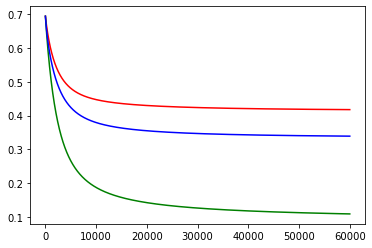

0.8187869822485208


In [375]:
classifier_stnd = logreg_classifier()
X_stnd, Y_stnd, test_X_stnd, test_y_stnd = classifier_stnd.df_to_train_test_split(standardized_df,labels)
cost_arr_stnd, W_stnd = classifier_stnd.train_logreg(X_stnd, Y_stnd, lr = 0.001, num_of_iterations = 60000)

plt.plot(cost_arr_stnd[:,0], label='class 0', c='r')
plt.plot(cost_arr_stnd[:,1], label='class 1', c='g')
plt.plot(cost_arr_stnd[:,2], label='class 2', c='b')
plt.show()

predictions_stnd = classifier_stnd.predict_logreg(test_X_stnd, W_stnd, 0.4)
accuracy_stnd = classifier_stnd.compute_accuracy(predictions_stnd, test_y_stnd)
print(accuracy_stnd)

# Trying a lower learning rate:

Completed 0 iterations.
Completed 4000 iterations.
Completed 8000 iterations.
Completed 12000 iterations.
Completed 16000 iterations.
Completed 20000 iterations.
Completed 24000 iterations.
Completed 28000 iterations.
Completed 32000 iterations.
Completed 36000 iterations.
Completed 40000 iterations.
Completed 44000 iterations.
Completed 48000 iterations.
Completed 52000 iterations.
Completed 56000 iterations.


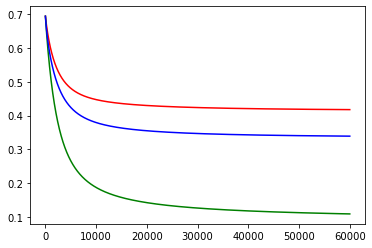

0.8187869822485208


In [378]:
classifier_stnd = logreg_classifier()
X_stnd, Y_stnd, test_X_stnd, test_y_stnd = classifier_stnd.df_to_train_test_split(standardized_df,labels)
cost_arr_stnd, W_stnd = classifier_stnd.train_logreg(X_stnd, Y_stnd, lr = 0.001, num_of_iterations = 60000)

plt.plot(cost_arr_stnd[:,0], label='class 0', c='r')
plt.plot(cost_arr_stnd[:,1], label='class 1', c='g')
plt.plot(cost_arr_stnd[:,2], label='class 2', c='b')
plt.show()

predictions_stnd = classifier_stnd.predict_logreg(test_X_stnd, W_stnd, 0.4)
accuracy_stnd = classifier_stnd.compute_accuracy(predictions_stnd, test_y_stnd)
print(accuracy_stnd)

# Defining a class with learning rate decay:

In [380]:
class logreg_classifier_decay():  
    #https://github.com/rahulrrai/multinomial-logistic-regression/blob/master/multinomial-logistic-regression.ipynb
    #https://towardsdatascience.com/logistic-regression-from-scratch-with-numpy-da4cc3121ece
    #Let's begin by defining the logit function for our logisitic regression:    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    #Ok now, we have the activation function to predict our outputs
    #Let's try to define what actually goes into the activation function

    #We need to split our data into training and testing sets
    #We have 47760 samples to train and test
    #0.85 = train, 0.15 = test, approx.
    #41000 train, 6760 test
    
    def df_to_train_test_split(self,df,labels):
        #df is the normalized or standardized df
        #labels are just the labels.
#         So we need 6760 test exmaples, in 18:4:1 ratio roughly to match the train test.<br>
#         So we need:<br>
#         1s - 294<br>
#         2s - 1176<br>
#         0s - 5290<br>
        data_with_labels = pd.concat([df, labels],axis = 1)
        data_with_labels_0s = data_with_labels[data_with_labels["LABELS"] == 0]
        data_with_labels_1s = data_with_labels[data_with_labels["LABELS"] == 1]
        data_with_labels_2s = data_with_labels[data_with_labels["LABELS"] == 2]
        
        data_1_test = data_with_labels_1s.iloc[0:294]
        data_2_test = data_with_labels_2s.iloc[0:1176]
        data_0_test = data_with_labels_0s.iloc[0:5290]

        data_1_train = data_with_labels_1s.iloc[294:]
        data_2_train = data_with_labels_2s.iloc[1176:]
        data_0_train = data_with_labels_0s.iloc[5290:]
        
        test = pd.concat([data_1_test, data_2_test, data_0_test])
        #Houston, we have a problem, we need to shuffle the indices, but pandas has us covered
        #https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
        train = pd.concat([data_1_train, data_2_train, data_0_train])
        
        #Shuffling:
        #df = df.sample(frac=1).reset_index(drop=True)
        test = test.sample(frac=1).reset_index(drop=True)
        train = train.sample(frac=1).reset_index(drop=True)
        
        #Finally, we have our train and test sets.
        #Let's try to follow this post: https://github.com/rahulrrai/multinomial-logistic-regression/blob/master/multinomial-logistic-regression.ipynb
        train_np = train.to_numpy()
        test_np = test.to_numpy()

        #number of training examples
        #this is 41000 in our case
        num_of_train = train_np.shape[0]
        num_of_test = test_np.shape[0]
        #retaining just the features
        X = train_np[:,:-1]
        test_X = test_np[:,:-1]
        ##As we are using vector implementation adding a column in X with all the value 1
        # I'm guessing this is the bias term added to our train matrix itself
        X = np.hstack((np.ones((num_of_train,1)),X))
        test_X = np.hstack((np.ones((num_of_test,1)), test_X))
        #output 
        y = train_np[:,-1:]
        test_y = test_np[:,-1:]
        #each individual entry in y is a numpy array, let's see if this works out.
        
        #We're doing one vs all classification
        #We're going to one hot encode the outputs here
        #We have 3 classes and num_of_train data points, so y has the shape num_of_train,3
        Y = np.zeros((num_of_train, 3))

        #no. of classes
        k = np.unique(y)
        k.sort()

        #one hot encoding:
        #We are populating Y based on y, Y is a one hot encoded version of the 0/1/2 based y
        #So we iterate through all possible values of our output, casting it to int.
        for cls in k.astype(int):
            Y[np.where(y[:,-1] == cls),cls] = 1
            
#         y[:,-1] => this helps get rid of the array within the array, and just returns an array with the labels<br>
#         y[:,-1] = cls => this is pretty straightforward, we compare the the value of the label array with each possible class<br>
#         np.where(y[:,-1] == cls) => this returns the indices where the target is some specific class value<br>
#         Y[np.where(y[:,-1] == cls),cls] = 1 => since Y was already a zero matrix, we columnwise overwrite 1s, getting the one-hot encoding for each class<br>
        return X, Y, test_X, test_y

#         We have 3 models. One for each class.<br>
#         Our weight matrix W has the shape, 3,number of features<br>
#         Our cost array has the shape number_of_iterations,3<br>
    def train_logreg(self, X, Y, lr = 0.001, num_of_iterations = 50000, decay_frequency = 25000):
        W = np.zeros((3,22))

        #learning rate - hyperparameter
        #lr
        num_of_train = X.shape[0]
        #no. of iterations to train
        #num_of_iterations = 20000
        #we can increase this later

        cost_arr = np.empty((0,3))

        for i in range(num_of_iterations):
            if i % 4000 == 0:
                print("Completed",i,"iterations.")
            if i % decay_frequency == 0 and i != 0:
                lr = lr / 2
            #dot product is commutative.
            f_x = np.dot(X, W.T)
            g_x = self.sigmoid(f_x)

            #cost function -1/(num_of_train) * cross entropy for each class
            #cross entropy is sum (y log h + (1-y)log(1-h))
            cost = (-1/(num_of_train)) * ((Y * np.log(g_x)) + ((1-Y) * np.log(1-g_x)))
            cost = cost.sum(axis=0)
            cost_arr = np.vstack((cost_arr,cost))

            #apply gradient descent to calculate new weights
            #new weights = old weights - (learning_rate/m * summation[(g_x-y)*x])
            #apparently the summation can be replaced by matrix multiplication
            change = (lr/num_of_train) * np.dot((g_x-Y).T, X)
            W = W - change

        return cost_arr, W
        
    def predict_logreg(self, test_X, W, threshold):
        num_of_test = test_X.shape[0]

        #predict
        pred = np.zeros((num_of_test, 3))
        model_predict = self.sigmoid(np.dot(test_X, W.T))
        pred[model_predict > threshold] = 1

        #converting the prediction matrix into vectors
        predict = np.zeros((num_of_test,1))
        predict[pred[:,1] == 1] = 1
        predict[pred[:,2] == 1] = 2

        return predict

    def compute_accuracy(self, predictions, test_y):
        x = predictions == test_y
        #x.shape[0]
        x = x.reshape((x.shape[0]))
        count = 0
        for i in x:
            if i == True:
                count+=1
        return count / x.shape[0]

Completed 0 iterations.
Completed 4000 iterations.
Completed 8000 iterations.
Completed 12000 iterations.
Completed 16000 iterations.
Completed 20000 iterations.
Completed 24000 iterations.
Completed 28000 iterations.
Completed 32000 iterations.
Completed 36000 iterations.
Completed 40000 iterations.
Completed 44000 iterations.
Completed 48000 iterations.
Completed 52000 iterations.
Completed 56000 iterations.
Completed 60000 iterations.
Completed 64000 iterations.
Completed 68000 iterations.
Completed 72000 iterations.
Completed 76000 iterations.
Completed 80000 iterations.
Completed 84000 iterations.
Completed 88000 iterations.
Completed 92000 iterations.
Completed 96000 iterations.


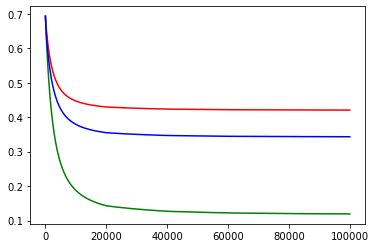

0.8164201183431953


In [384]:
classifier_decay = logreg_classifier_decay()
X_decay, Y_decay, test_X_decay, test_y_decay = classifier_decay.df_to_train_test_split(standardized_df,labels)
cost_arr_decay, W_decay = classifier_decay.train_logreg(X_decay, Y_decay, lr = 0.001, num_of_iterations = 100000, decay_frequency = 20000)

plt.plot(cost_arr_decay[:,0], label='class 0', c='r')
plt.plot(cost_arr_decay[:,1], label='class 1', c='g')
plt.plot(cost_arr_decay[:,2], label='class 2', c='b')
plt.show()

predictions_decay = classifier_decay.predict_logreg(test_X_decay, W_decay, 0.4)
accuracy_decay = classifier_decay.compute_accuracy(predictions_decay, test_y_decay)
print(accuracy_decay)

In [383]:
#LR Decay results:
#60k iterations
# initial lr = 0.001
# num_of_iter = 60000
# decay frequency = 15k, 20k, 25k, 
# accuracy = 81.3%, 81.55%, 81.67%

In [385]:
#LR Decay results:
# 60k iterations
# initial lr = 0.001
# num_of_iter = 100000
# decay frequency = 15k, 20k, 25k, 
# accuracy = 81.43%,81.64%,81.71%

In [ ]:
#LR Decay results:
# accuracy = 82.1%, lr = 0.001, num_of_iterations = 150000, decay_frequency = 50000
# accuracy = 82.3%, lr = 0.01, num_of_iterations = 10000, decay_frequency = 50000
# accuracy = 83.04%, lr = 0.1, num_of_iterations = 10000, decay_frequency = 50000
# accuracy = 83.00%, lr = 0.2, num_of_iterations = 10000, decay_frequency = 50000
# accuracy = 82.92%, lr = 0.1, num_of_iterations = 100000, decay_frequency = 50000
# accuracy = 82.76% lr = 0.001, num_of_iterations = 200000, no decay
# accuracy = 82.97%, lr = 0.1, num_of_iterations = 100000, decay_frequency = 50000, decay_factor = 4
# accuracy = 82.9%, lr = 0.1, num_of_iterations = 100000, decay_frequency = 50000
# accuracy= 82.94%, lr = 0.1, num_of_iterations = 100000, decay_frequency = 100000)
#accuracy = 82.94%, lr = 0.1, num_of_iterations = 100000, decay_frequency = 50000, decay_factor = 10


Completed 0 iterations.
Completed 4000 iterations.
Completed 8000 iterations.
Completed 12000 iterations.
Completed 16000 iterations.
Completed 20000 iterations.
Completed 24000 iterations.
Completed 28000 iterations.
Completed 32000 iterations.
Completed 36000 iterations.
Completed 40000 iterations.
Completed 44000 iterations.
Completed 48000 iterations.
Completed 52000 iterations.
Completed 56000 iterations.
Completed 60000 iterations.
Completed 64000 iterations.
Completed 68000 iterations.
Completed 72000 iterations.
Completed 76000 iterations.
Completed 80000 iterations.
Completed 84000 iterations.
Completed 88000 iterations.
Completed 92000 iterations.
Completed 96000 iterations.
Completed 100000 iterations.
Completed 104000 iterations.
Completed 108000 iterations.
Completed 112000 iterations.
Completed 116000 iterations.
Completed 120000 iterations.
Completed 124000 iterations.
Completed 128000 iterations.
Completed 132000 iterations.
Completed 136000 iterations.
Completed 140000

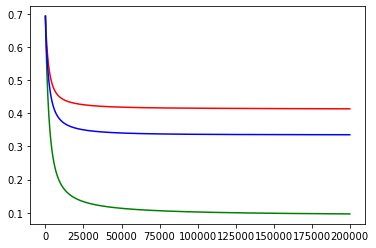

0.8276627218934911


In [387]:
#Let's try normal logreg classifier for 200k iterations with no decay:
classifier_200 = logreg_classifier()
X_200, Y_200, test_X_200, test_y_200 = classifier_200.df_to_train_test_split(standardized_df,labels)
cost_arr_200, W_200 = classifier_200.train_logreg(X_200, Y_200, lr = 0.001, num_of_iterations = 200000)

plt.plot(cost_arr_200[:,0], label='class 0', c='r')
plt.plot(cost_arr_200[:,1], label='class 1', c='g')
plt.plot(cost_arr_200[:,2], label='class 2', c='b')
plt.show()

predictions_200 = classifier_200.predict_logreg(test_X_200, W_200, 0.4)
accuracy_200 = classifier_200.compute_accuracy(predictions_200, test_y_200)
print(accuracy_200)